In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#импорт библиотек

После импорта создаём табличку

In [2]:
ca = pd.read_csv('/home/user/sas/Nova-main/the_unlimited_power.csv')
ca.head(12)



,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN
5,Максим Юсов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304233768/,Серпухов,sale,flat,2,3,1,46.7,...,-1,25 м²,6 м²,79647820594,-1,Серпухов,2-я Московская,6к3,NaN,NaN
6,ID 9655060,unknown,https://serpukhov.cian.ru/sale/flat/304697154/,Серпухов,sale,flat,3,5,1,29.0,...,-1,25 м²,-1,79645658245,3 м,Серпухов,Форсса,10,NaN,NaN
7,Этажи Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304332318/,Серпухов,sale,flat,3,6,1,19.1,...,-1,-1,-1,79647821411,-1,Серпухов,Крюкова,4,NaN,NaN
8,Ольга Протченко,realtor,https://serpukhov.cian.ru/sale/flat/295915722/,Серпухов,sale,flat,1,2,1,27.1,...,-1,18 м²,6 м²,79671343432,"2,5 м",NaN,NaN,NaN,NaN,NaN
9,Глеб Маслов,realtor,https://serpukhov.cian.ru/sale/flat/304548494/,Серпухов,sale,flat,6,9,2,42.7,...,-1,"29,7 м²","5,6 м²",79150509841,"2,7 м",Серпухов,Весенняя,56,NaN,NaN


Так как уже заметны пропуски в данных, перепроверяем всё через хитмап, чтобы лучше увидеть проблему

<Axes: >

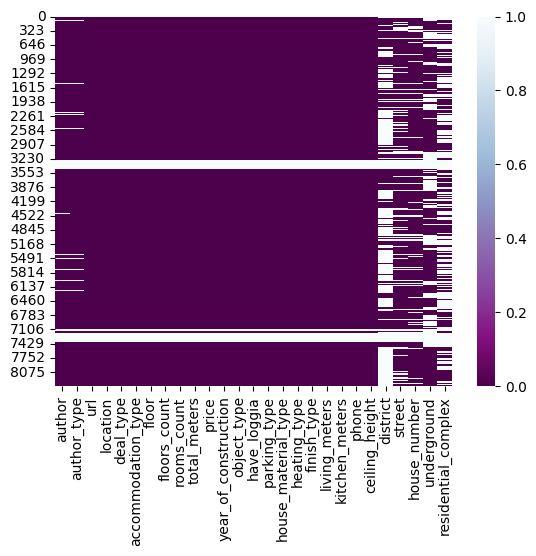

In [3]:
sns.heatmap(ca.isnull(), cmap='BuPu_r')

Дополнительно смотрим значения пропусков в процентах

In [4]:
null_counts_cian = ca.isnull().sum().reset_index()
null_counts_cian.columns = ['Column', 'Null Count']

total_counts = ca.shape[0]

null_counts_cian['Null Percentage'] = ((null_counts_cian['Null Count'] / total_counts) * 100).map('{:.2f}%'.format)

print(null_counts_cian)

                  Column  Null Count Null Percentage
0                 author         801           9.54%
1            author_type         798           9.51%
2                    url         487           5.80%
3               location         487           5.80%
4              deal_type         487           5.80%
5     accommodation_type         487           5.80%
6                  floor         487           5.80%
7           floors_count         487           5.80%
8            rooms_count         487           5.80%
9           total_meters         487           5.80%
10                 price         500           5.96%
11  year_of_construction         487           5.80%
12           object_type         487           5.80%
13           have_loggia         487           5.80%
14          parking_type         487           5.80%
15   house_material_type         487           5.80%
16          heating_type         487           5.80%
17           finish_type         487          

По меньшей мере 487 строк пусты, а так же огромной части данных не хватает. Нужно сразу избавиться от бесполезной информации, которая не нужна машине для обучения.
Так же убираем м² из данных, которые будут нужны нам позже

In [5]:
ca.drop(['deal_type', 'author_type', 'url', 'author', 'accommodation_type', 'house_number', 'phone', 'heating_type', 'finish_type', 'house_material_type', 'ceiling_height', 'floors_count'], axis=1, inplace=True)

columns_to_convert = ['living_meters', 'kitchen_meters'] 


def clean_and_convert(value):
    if isinstance(value, str):

        value = re.sub(r'\s*м²|\s*м', '', value)  
    return pd.to_numeric(value, errors='coerce')  


for column in columns_to_convert:
    ca[column] = ca[column].apply(clean_and_convert)

ca.replace('-1', np.nan, inplace=True)

ca.head(8)

,location,floor,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,district,street,underground,residential_complex
0,Серпухов,6,1,20.7,2350000,1917,Вторичка,NaN,Наземная,18.0,1.0,Серпухов,Крюкова,NaN,NaN
1,Серпухов,1,1,33.0,4150000,1975,Вторичка,NaN,NaN,18.0,6.0,NaN,Ворошилова,Аннино,NaN
2,Серпухов,4,1,14.0,1700000,NaN,Вторичка,NaN,NaN,-1.0,-1.0,Красный Текстильщик мкр,Красный Текстильщик,NaN,NaN
3,Серпухов,5,1,17.5,2500000,1968,Вторичка,NaN,NaN,-1.0,-1.0,Серпухов,Российская,NaN,NaN
4,Серпухов,4,1,25.9,3000000,2009,Вторичка,NaN,Наземная,20.0,5.0,Серпухов,Химиков,NaN,NaN
5,Серпухов,2,1,46.7,6599999,NaN,Вторичка,NaN,NaN,25.0,6.0,Серпухов,2-я Московская,NaN,NaN
6,Серпухов,3,1,29.0,3350000,1917,Вторичка,NaN,Наземная,25.0,-1.0,Серпухов,Форсса,NaN,NaN
7,Серпухов,3,1,19.1,3600000,1917,Вторичка,NaN,NaN,-1.0,-1.0,Серпухов,Крюкова,NaN,NaN


author, author_type, url, phone - не нужные для машины данные, они все уникальные и ей учитываться не должны. Поэтому убраны.

deal_type, accommodation_type, heating_type, finish_type, house_material_type, floors_count - одинаковые данные в нашем случае. Так как парсились квартиры, у них у всех эти значения одинаковые, поэтому от них нужно избавиться.

house_number, ceiling_height - не влияющие на цену данные. Путём ручных проверок на циане, а так же проверкой регламента у застройщиков, выяснилось: номер дома не влияет на цену от слова совсем; высота потолка всегда равна или больше 2,5 метров, из-за чего так же на цену не влияет.

In [6]:
ca.shape


(8393, 15)

Проверяем на дубликаты и тут же удаляем их

In [7]:
ca = ca.drop_duplicates()

ca.shape



(7207, 15)

Убрали дубликаты и посчитали количество строк со столбцов

In [8]:
ca.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7207 entries, 0 to 8392
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7206 non-null   object 
 1   floor                 7206 non-null   object 
 2   rooms_count           7113 non-null   object 
 3   total_meters          7206 non-null   object 
 4   price                 7193 non-null   object 
 5   year_of_construction  5956 non-null   object 
 6   object_type           7206 non-null   object 
 7   have_loggia           4149 non-null   object 
 8   parking_type          4038 non-null   object 
 9   living_meters         4411 non-null   float64
 10  kitchen_meters        4531 non-null   float64
 11  district              2869 non-null   object 
 12  street                5715 non-null   object 
 13  underground           5003 non-null   object 
 14  residential_complex   3633 non-null   object 
dtypes: float64(2), object(13)


Делаем Хитмап и смотрим количество пропусков

<Axes: >

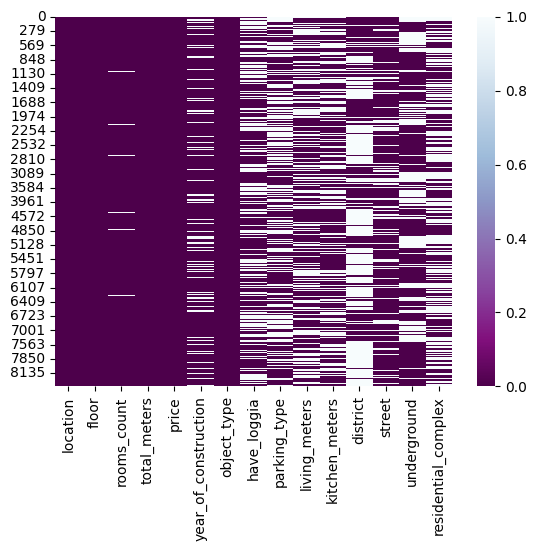

In [9]:
sns.heatmap(ca.isnull(), cmap='BuPu_r')


Огромное количество пропусков, с которыми нужно что-то сделать

In [10]:
null_counts_cian = ca.isnull().sum().reset_index()
null_counts_cian.columns = ['Column', 'Null Count']

total_counts = ca.shape[0]

null_counts_cian['Null Percentage'] = ((null_counts_cian['Null Count'] / total_counts) * 100).map('{:.2f}%'.format)

print(null_counts_cian)

                  Column  Null Count Null Percentage
0               location           1           0.01%
1                  floor           1           0.01%
2            rooms_count          94           1.30%
3           total_meters           1           0.01%
4                  price          14           0.19%
5   year_of_construction        1251          17.36%
6            object_type           1           0.01%
7            have_loggia        3058          42.43%
8           parking_type        3169          43.97%
9          living_meters        2796          38.80%
10        kitchen_meters        2676          37.13%
11              district        4338          60.19%
12                street        1492          20.70%
13           underground        2204          30.58%
14   residential_complex        3574          49.59%


Относительно колонок district, street, parking_type, underground и have_loggia есть идеи.
Так как они сильно влияют на цену, их нельхя удалять. Поэтому заполняю их либо информацией друг друга, либо при помощи новых значений, такиъ, как "Нет"

In [11]:
ca['district'] = ca['district'].fillna(ca['location'])
ca['street'] = ca['street'].fillna(ca['district'])
ca['parking_type'] = ca['parking_type'].fillna('Нет')
ca['underground'] = ca['underground'].fillna('Нет')
ca['have_loggia'] = ca['have_loggia'].fillna('Нет')
ca = ca.drop(index=1)

columns_to_check = ['location', 'floor', 'total_meters', 'price', 'rooms_count', 'object_type', 'rooms_count', 'kitchen_meters', 'year_of_construction', 'living_meters', 'residential_complex']
ca_cleaned = ca.dropna(subset=columns_to_check, inplace=True)


Перепроверяем пропуски

In [12]:
null_counts_cian = ca.isnull().sum().reset_index()
null_counts_cian.columns = ['Column', 'Null Count']

print(null_counts_cian)



                  Column  Null Count
0               location           0
1                  floor           0
2            rooms_count           0
3           total_meters           0
4                  price           0
5   year_of_construction           0
6            object_type           0
7            have_loggia           0
8           parking_type           0
9          living_meters           0
10        kitchen_meters           0
11              district           0
12                street           0
13           underground           0
14   residential_complex           0


<Axes: >

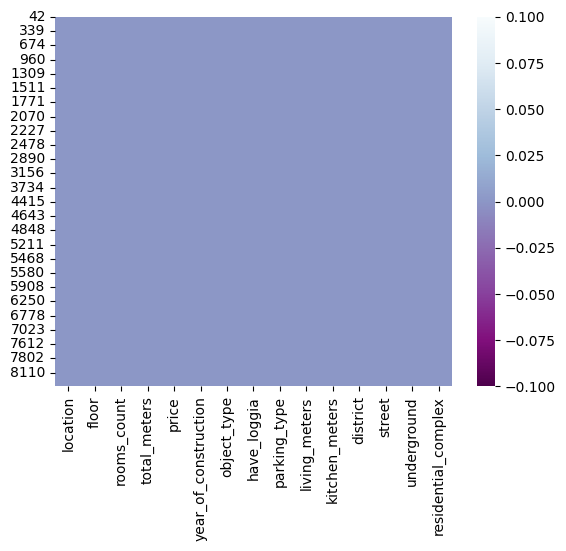

In [13]:
sns.heatmap(ca.isnull(), cmap='BuPu_r')


In [14]:
ca.head(8)

,location,floor,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,district,street,underground,residential_complex
42,Серпухов,2,2,38.4,6700000,2013,Вторичка,2 лоджии,Наземная,17.0,11.0,Серпухов,Ворошилова,Нет,по ул. Ворошилова
63,Дубна,5,1,50.0,9550000,2019,Вторичка,1 балкон,Наземная,25.0,10.0,Дубна,Программистов,Нет,на ул. Программистов
78,Дубна,7,2,75.4,10103600,2025,Новостройка,Нет,Нет,-1.0,-1.0,Дубна,Дубна,Нет,Феникс
81,Дубна,2,2,69.3,9979200,2024,Новостройка,Нет,Нет,-1.0,-1.0,Дубна,Программистов,Нет,по ул. Макаренко
84,Дубна,1,2,75.1,10664200,2024,Новостройка,Нет,Нет,-1.0,-1.0,Дубна,Программистов,Нет,по ул. Макаренко
87,Дубна,1,2,67.7,9613400,2024,Новостройка,Нет,Нет,-1.0,-1.0,Дубна,Программистов,Нет,по ул. Макаренко
89,Дубна,9,2,69.5,10147000,2024,Новостройка,Нет,Нет,-1.0,-1.0,Дубна,Программистов,Нет,по ул. Макаренко
92,Дубна,1,3,86.8,10850000,2024,Новостройка,Нет,Нет,-1.0,-1.0,Дубна,Программистов,Нет,по ул. Макаренко


График кол-ва комнат

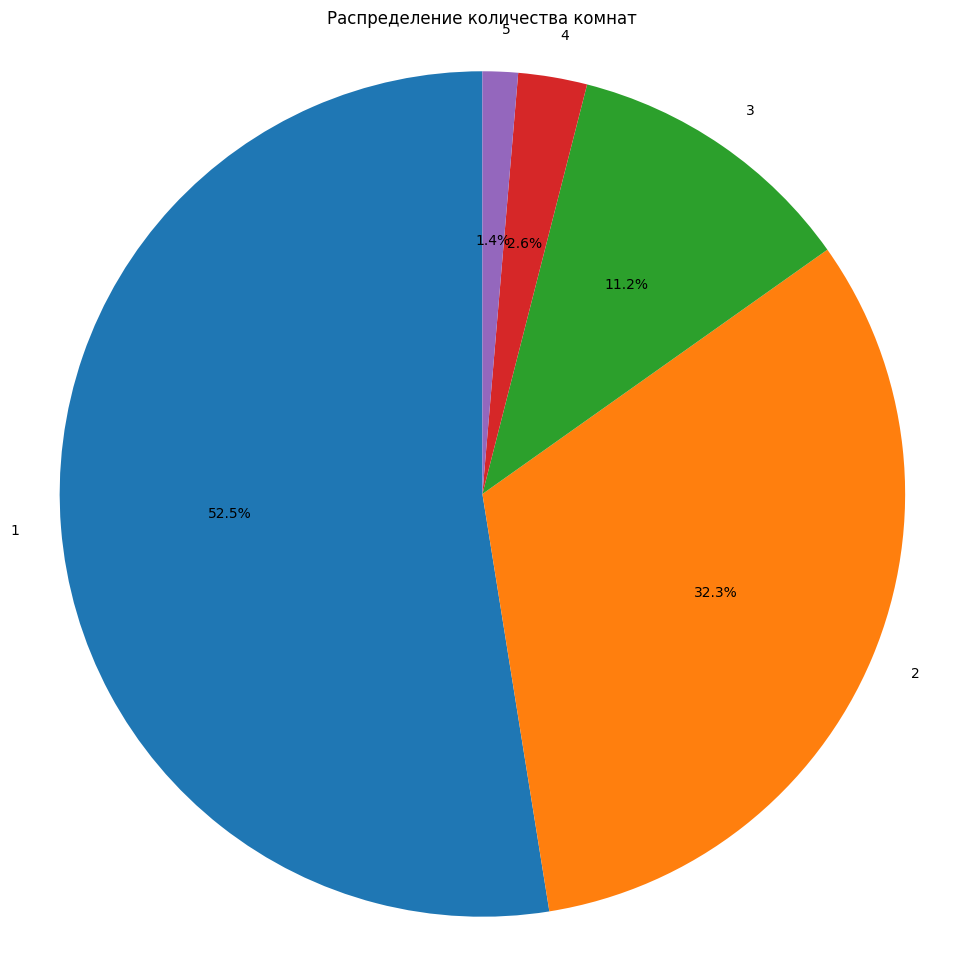

In [15]:
rooms_counts = ca['rooms_count'].value_counts()
plt.figure(figsize=(12, 12))
plt.pie(rooms_counts, labels=rooms_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение количества комнат')
plt.axis('equal') 
plt.show()



Красота! Теперь проверяем выбросы

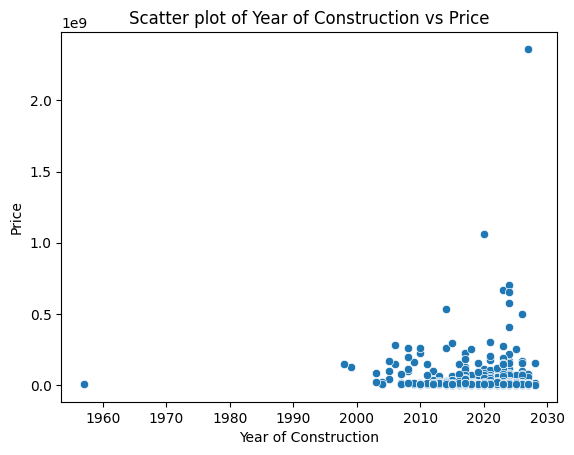

In [16]:
ca['year_of_construction'] = pd.to_numeric(ca['year_of_construction'], errors='coerce')


ca = ca.dropna(subset=['year_of_construction'])


ca['year_of_construction'] = ca['year_of_construction'].astype('float64')
ca['price'] = ca['price'].astype('float64')
#заодно делаем нужные столбцы float64 и удаляем из них лишние буквенные значения

sns.scatterplot(data=ca, x='year_of_construction', y='price')
plt.title('Scatter plot of Year of Construction vs Price')
plt.xlabel('Year of Construction')
plt.ylabel('Price')
plt.show()



так как есть аномалии, явно заходящие за рамки нужных значений, пишу дополнительный код, чтобы от них избавиться

In [17]:
min_max_values = {
    'year_of_construction': (1970, 2025),  
    'rooms_count': (1, 5)   
}


cleaned_ca = pd.DataFrame()


for column in ca.columns:
    if column in min_max_values:
        
        ca[column] = pd.to_numeric(ca[column], errors='coerce')
        
        min_value, max_value = min_max_values[column]
        
       
        filtered_column = ca[column][(ca[column] >= min_value) & (ca[column] <= max_value)]
        
        
        cleaned_ca[column] = filtered_column.reset_index(drop=True)
        

Смотрим график зависимости цены от метража квартиры

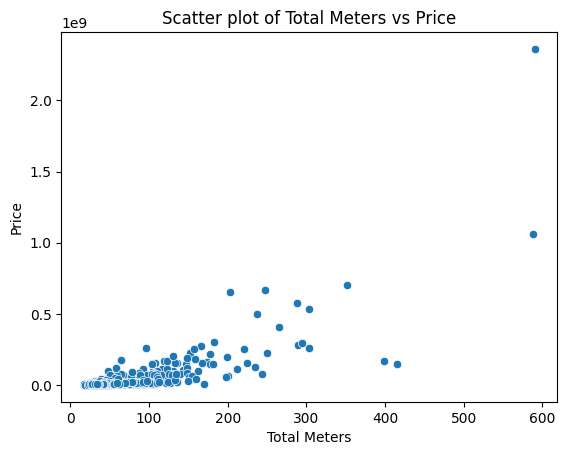

In [18]:
ca['total_meters'] = pd.to_numeric(ca['total_meters'], errors='coerce')

ca = ca.dropna(subset=['total_meters'])


ca['price'] = ca['price'].astype('float64')
ca['total_meters'] = ca['total_meters'].astype('float64')


sns.scatterplot(data=ca, x='total_meters', y='price')
plt.title('Scatter plot of Total Meters vs Price')
plt.xlabel('Total Meters')
plt.ylabel('Price')
plt.show()


Никаких аномалий нет
(проверенно, что такие квартиры с метражом около 600м существуют и стоят бешенных денег)


Заодно заменяем -1 на "Не указано"

In [19]:



if not ca.empty:
    
    ca.replace(-1, np.nan, inplace=True)

   
    ca.fillna("не указано", inplace=True)

/tmp/ipykernel_41724/3338889232.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'не указано' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ca.fillna("не указано", inplace=True)


ищем цену за метр и добавляем в табличку

In [20]:
ca['price'] = pd.to_numeric(ca['price'], errors='coerce')
ca['total_meters'] = pd.to_numeric(ca['total_meters'], errors='coerce')
ca['price_for_metre'] = ca['price'] / ca['total_meters'].replace(0, pd.NA)

ca.head(12)



,location,floor,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,district,street,underground,residential_complex,price_for_metre
42,Серпухов,2,2,38.4,6700000.0,2013.0,Вторичка,2 лоджии,Наземная,17.0,11.0,Серпухов,Ворошилова,Нет,по ул. Ворошилова,174479.166667
63,Дубна,5,1,50.0,9550000.0,2019.0,Вторичка,1 балкон,Наземная,25.0,10.0,Дубна,Программистов,Нет,на ул. Программистов,191000.000000
78,Дубна,7,2,75.4,10103600.0,2025.0,Новостройка,Нет,Нет,не указано,не указано,Дубна,Дубна,Нет,Феникс,134000.000000
81,Дубна,2,2,69.3,9979200.0,2024.0,Новостройка,Нет,Нет,не указано,не указано,Дубна,Программистов,Нет,по ул. Макаренко,144000.000000
84,Дубна,1,2,75.1,10664200.0,2024.0,Новостройка,Нет,Нет,не указано,не указано,Дубна,Программистов,Нет,по ул. Макаренко,142000.000000
87,Дубна,1,2,67.7,9613400.0,2024.0,Новостройка,Нет,Нет,не указано,не указано,Дубна,Программистов,Нет,по ул. Макаренко,142000.000000
89,Дубна,9,2,69.5,10147000.0,2024.0,Новостройка,Нет,Нет,не указано,не указано,Дубна,Программистов,Нет,по ул. Макаренко,146000.000000
92,Дубна,1,3,86.8,10850000.0,2024.0,Новостройка,Нет,Нет,не указано,не указано,Дубна,Программистов,Нет,по ул. Макаренко,125000.000000
95,Дубна,2,3,94.0,11797000.0,2025.0,Новостройка,Нет,Нет,не указано,не указано,Дубна,Дубна,Нет,Феникс,125500.000000
98,Дубна,9,3,121.5,15248250.0,2025.0,Новостройка,Нет,Нет,не указано,не указано,Дубна,Дубна,Нет,Феникс,125500.000000


делаем матрицу корреляции

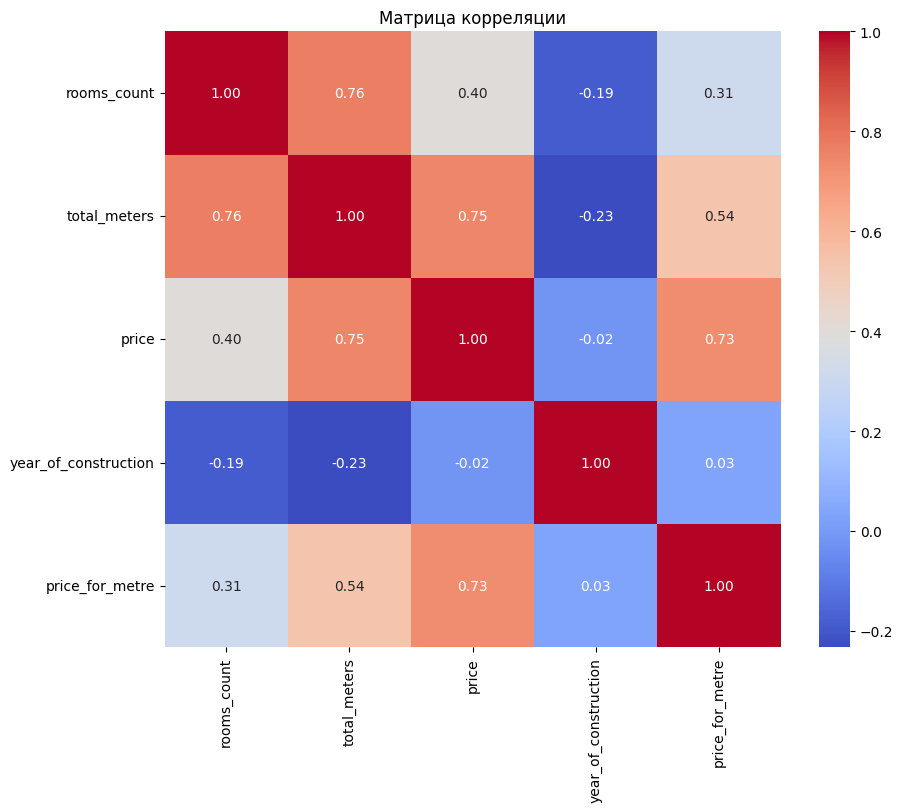

In [21]:
ca_cleaned = ca.dropna()


numeric_ca = ca_cleaned.select_dtypes(include=[np.number])

correlation_matrix = numeric_ca.corr()


correlation_matrix = correlation_matrix.astype(np.float64)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Матрица корреляции')
plt.show()

Что мы видим? Наибольшее влияние на цену за метр оказывает общий метраж квартиры, меньшее влияние оказывает количество комнат и совсем ничтожный метраж кухни